In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import Bio
import statsmodels.api as sm
import re
import ast

In [35]:
path: str = './data/'
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_sec_structure.csv"))

seperate cell and lysate data --> lysate hat mehr daten und alle spezies --> besser

In [36]:

#prokaryotes_lysate = prokaryotes[prokaryotes['run_name'].str.contains('lysate', case=True)].dropna(subset=['meltPoint'])
#prokaryotes_cells = prokaryotes[prokaryotes['run_name'].str.contains('cells', case=True)].dropna(subset=['meltPoint'])

#print(prokaryotes_cells_NaN['run_name'].unique())
#print(prokaryotes_lysate_NaN['run_name'].unique())

psipred prediction accuracy

In [37]:
secs = ['Helix1','Turn1','Sheet1','Helix2','Coil2','Sheet2']
for p in range(len(prokaryotes)):
    for s in secs:
        if pd.isnull(prokaryotes.at[p, s]) == False:    	
            prokaryotes.at[p, s] = ast.literal_eval(prokaryotes.at[p, s])

In [38]:
#calculates the relative and mean error of the psipred prediction against the crystallography structure

secs = ['Helix1','Turn1','Sheet1','Helix2','Coil2','Sheet2']

secs1=['Helix1', 'Turn1', 'Sheet1']
secs2=['Helix2', 'Coil2', 'Sheet2']

helix_fehler = []
sheet_fehler = []

for n in range(len(prokaryotes)):
        if isinstance(prokaryotes.at[n, 'Helix1'], list)  and isinstance(prokaryotes.at[n, 'Sheet1'], list):
            if len(prokaryotes.at[n, 'Helix2']) != 0  and len(prokaryotes.at[n, 'Sheet2']) != 0:
                if len(prokaryotes.at[n, 'Helix2'])-len(prokaryotes.at[n, 'Helix1']) == 0:
                    helix_fehler.append(0)
                else:
                    helix_fehler.append(abs((len(prokaryotes.at[n, 'Helix2'])-len(prokaryotes.at[n, 'Helix1']))/len(prokaryotes.at[n, 'Helix2'])))
                if len(prokaryotes.at[n, 'Sheet2'])-len(prokaryotes.at[n, 'Sheet1']) == 0:
                    sheet_fehler.append(0)
                else: 
                    sheet_fehler.append(abs((len(prokaryotes.at[n, 'Sheet2'])-len(prokaryotes.at[n, 'Sheet1']))/len(prokaryotes.at[n, 'Sheet2'])))


helix_fehler_m = sum(helix_fehler)/len(helix_fehler)
print(helix_fehler_m)
sheet_fehler_m = sum(sheet_fehler)/len(sheet_fehler)
print(sheet_fehler_m)




0.28414863274420277
0.36267381635937457


In [39]:
secs = ['Helix1','Turn1','Sheet1','Helix2','Coil2','Sheet2']

secs1=['Helix1', 'Turn1', 'Sheet1']
secs2=['Helix2', 'Coil2', 'Sheet2']

helix_fehler = []
sheet_fehler = []

for n in range(len(prokaryotes)):
        if isinstance(prokaryotes.at[n, 'Helix1'], list)  and isinstance(prokaryotes.at[n, 'Sheet1'], list):
            if len(prokaryotes.at[n, 'Helix2']) != 0:
                if len(prokaryotes.at[n, 'Helix2'])-len(prokaryotes.at[n, 'Helix1']) == 0:
                    helix_fehler.append(0)
                else:
                    helix_fehler.append(abs((len(prokaryotes.at[n, 'Helix2'])-len(prokaryotes.at[n, 'Helix1']))/len(prokaryotes.at[n, 'Helix2'])))
            if len(prokaryotes.at[n, 'Sheet2']) != 0:
                if len(prokaryotes.at[n, 'Sheet2'])-len(prokaryotes.at[n, 'Sheet1']) == 0:
                    sheet_fehler.append(0)
                else: 
                    sheet_fehler.append(abs((len(prokaryotes.at[n, 'Sheet2'])-len(prokaryotes.at[n, 'Sheet1']))/len(prokaryotes.at[n, 'Sheet2'])))


helix_fehler_m = sum(helix_fehler)/len(helix_fehler)
print(helix_fehler_m)
sheet_fehler_m = sum(sheet_fehler)/len(sheet_fehler)
print(sheet_fehler_m)

0.2806356997728683
0.364079562804235


use tobis function for secondary structure and compare its accuracy to crystallography

In [40]:
#use the function to calculate the amount of helices, sheets and turns
from function import univt3
from function import univt2

tobisfunction = []

for n in range(len(prokaryotes)):
    tobisfunction.append(univt3(prokaryotes.loc[n, 'Sequence']))

#now compare the function to the crystallography data

helix_f_tobi = []
sheet_f_tobi = []

for n in range(len(prokaryotes)):
        if isinstance(prokaryotes.at[n, 'Helix1'], list)  and isinstance(prokaryotes.at[n, 'Sheet1'], list):
            if tobisfunction[n][0] != 0:
                if tobisfunction[n][0]-len(prokaryotes.at[n, 'Helix1']) == 0:
                    helix_f_tobi.append(0)
                else:
                    helix_f_tobi.append(abs((tobisfunction[n][0]-len(prokaryotes.at[n, 'Helix1']))/tobisfunction[n][0]))
            if tobisfunction[n][1] != 0:
                if tobisfunction[n][0]-len(prokaryotes.at[n, 'Sheet1']) == 0:
                    sheet_f_tobi.append(0)
                else: 
                    sheet_f_tobi.append(abs((tobisfunction[n][1]-len(prokaryotes.at[n, 'Sheet1']))/tobisfunction[n][1]))


helix_fehler_tobi_m = sum(helix_f_tobi)/len(helix_f_tobi)
print(helix_fehler_tobi_m)
sheet_fehler_tobi_m = sum(sheet_f_tobi)/len(sheet_f_tobi)
print(sheet_fehler_tobi_m)

0.31102381120254796
0.3469988777144564


maxi macht marik sachen - append salt bridge data to prokaryotes and calculate correlation

In [41]:
from function import salt_bridge
path = './data/pdbs'
Salt_bridges = salt_bridge(path)


In [42]:
# here I calculate the amount of brdiges as well as the sum of the bridge distances within the saltbridge dictionary

amount_bridges = {}

for n, k in Salt_bridges.items():
    amount_bridges[n] = np.sum(~np.isnan(k)) - sum(Salt_bridges[n].shape) +2

print(amount_bridges)

sum_bridges = {}
    
for n, k in Salt_bridges.items():
    sum_bridges[n] = np.nansum(k) - np.nansum(Salt_bridges[n][0,:]) - np.nansum(Salt_bridges[n][:,0])

print(sum_bridges)





[[         nan  60.         390.         458.         835.
  836.        ]
 [366.                  nan   2.75298928          nan          nan
           nan]
 [430.                  nan          nan   2.69241267          nan
           nan]
 [551.                  nan          nan          nan   2.97577435
    2.84695592]
 [552.                  nan          nan          nan   2.74490601
           nan]
 [891.           3.02476462          nan          nan          nan
           nan]
 [918.                  nan          nan          nan          nan
    3.26206131]]
13
{'P10943': 7, 'R4YQY5': 6, 'R4YS35': 27, 'R4YQ82': 28, 'R4YR35': 13, 'Q72GG0': 52, 'Q6L2L6': 21, 'O32293': 9, 'R4YUW3': 19, 'Q6L0G1': 16, 'P37330': 90, 'R4YM62': 2, 'P94525': 15, 'O34325': 25, 'O34474': 6, 'Q6L159': 27, 'O07585': 23, 'R4YJR4': 42, 'R4YMW5': 16, 'P94425': 19, 'R4YL62': 16, 'Q72IF5': 25, 'R4YKR4': 19, 'O31639': 11, 'P39765': 21, 'Q72LH3': 14, 'Q72KM2': 30, 'O35043': 17, 'R4YJF6': 75, 'P52998': 38, 'Q72JY0

In [43]:
for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n,'AlphaFoldDB']) == False:
        if prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')  in amount_bridges:
            prokaryotes.loc[n, 'A_Salty'] = amount_bridges[prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')]

for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n,'AlphaFoldDB']) == False:
        if prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')  in sum_bridges:
            prokaryotes.loc[n, 'S_Salty'] = sum_bridges[prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')]

In [44]:
#calculate mean salt bridge length per protein and append it to the df
M_Salty = []

for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n, 'S_Salty']) == False and pd.isnull(prokaryotes.loc[n, 'A_Salty']) == False and prokaryotes.loc[n, 'S_Salty'] !=0 and prokaryotes.loc[n, 'A_Salty'] !=0:
        M_Salty = (prokaryotes.loc[n, 'S_Salty']/prokaryotes.loc[n, 'A_Salty'])
        prokaryotes.loc[n, 'M_Salty'] = M_Salty
    elif pd.isnull(prokaryotes.loc[n, 'S_Salty']) == True:
       prokaryotes.loc[n, 'M_Salty'] = np.nan
    elif pd.isnull(prokaryotes.loc[n, 'A_Salty']) == True:
        prokaryotes.loc[n, 'M_Salty'] = np.nan
    elif prokaryotes.loc[n, 'S_Salty'] ==0:
        prokaryotes.loc[n, 'M_Salty'] = np.nan
    elif prokaryotes.loc[n, 'A_Salty'] ==0:
        prokaryotes.loc[n, 'M_Salty'] = np.nan





correltaion between sum and amount of salt bridges to Tm

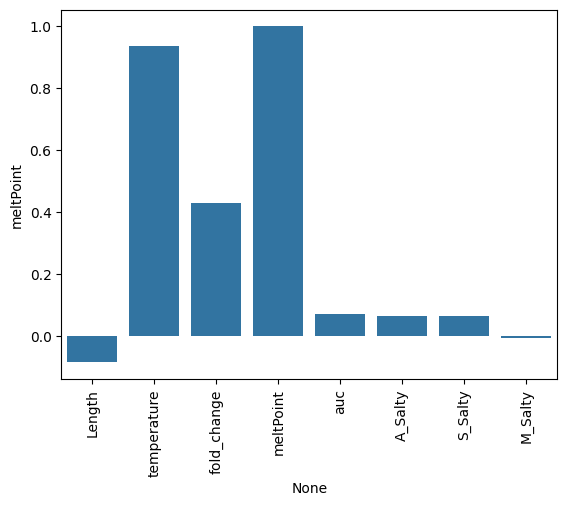

In [45]:

prokaryotes_salt_NaN = prokaryotes.dropna(subset='meltPoint')

prok_s_corr = prokaryotes_salt_NaN.corr('pearson', numeric_only=True)

sns.barplot(data= prok_s_corr, y= 'meltPoint', x = prok_s_corr.columns)
plt.xticks(rotation = 90)
plt.show()

Hydrophobic patches - integration

In [46]:
from function import VdW_interaction
VdW_clus, VdW_vol = VdW_interaction('./data/pdbs' )


calculate amount of clusters/hydrophobic regions

In [99]:
#calculate the amount of cluster
amount_cluster = {}

for n,k in VdW_clus.items():
        amount_cluster[n] = len(k)

length_cluster = {}
cluster_list = []

#calculate the lenght of the lists i.e. the amount of AS per cluster/hydrophobic patch
def calculate_list_lengths(VdW_clus):
    length_cluster = {}
    for key, value in VdW_clus.items():
        total_length = 0
        
        if isinstance(value, dict):
            for sub_key, sub_value in value.items():
                    total_length += len(sub_value)
        
        length_cluster[key] = total_length
    
    return length_cluster

length_cluster = calculate_list_lengths(VdW_clus)
                


{'P10943': 114, 'R4YQY5': 168, 'R4YS35': 195, 'R4YQ82': 183, 'R4YR35': 90, 'Q72GG0': 288, 'Q6L2L6': 231, 'O32293': 90, 'R4YUW3': 135, 'Q6L0G1': 117, 'P37330': 477, 'R4YM62': 84, 'P94525': 156, 'O34325': 390, 'O34474': 471, 'Q6L159': 609, 'O07585': 420, 'R4YJR4': 459, 'R4YMW5': 405, 'P94425': 57, 'R4YL62': 240, 'Q72IF5': 111, 'R4YKR4': 105, 'O31639': 57, 'P39765': 159, 'Q72LH3': 120, 'Q72KM2': 180, 'O35043': 249, 'R4YJF6': 444, 'P52998': 207, 'Q72JY0': 651, 'Q72H30': 312, 'P26935': 261, 'O32159': 237, 'Q72HR7': 276, 'P00864': 633, 'Q72J87': 87, 'Q72KY0': 288, 'R4YLC7': 171, 'O05234': 54, 'P13036': 405, 'Q72IR7': 402, 'P76641': 276, 'P19319': 711, 'R4YNH0': 195, 'R4YSF0': 429, 'Q72HA8': 126, 'P31808': 153, 'P94558': 120, 'P29013': 300, 'O34358': 288, 'Q6L124': 111, 'R4YMP8': 288, 'R4YUC1': 54, 'Q6L024': 318, 'R4YLP8': 561, 'Q6L2X4': 441, 'R4YQK4': 270, 'P50866': 336, 'P42403': 255, 'O31590': 105, 'Q6L1U0': 267, 'Q6L047': 249, 'Q72GU1': 207, 'P24469': 78, 'P77544': 141, 'O07939': 93, 'R4Y

now concat the dictionaries onto the prokaryote df

In [103]:
for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n,'AlphaFoldDB']) == False:
        if prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')  in amount_cluster:
            prokaryotes.loc[n, 'Amount_Cluster'] = amount_cluster[prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')]

#now divide amount of clusters by amino acid sequenz

for n in range(len(prokaryotes)):
    prokaryotes.loc[n, 'relative_Amount_Cluster'] = prokaryotes.loc[n, 'Amount_Cluster']/prokaryotes.loc[n, 'Length']


for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n,'AlphaFoldDB']) == False and prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')  in length_cluster:
        prokaryotes.loc[n, 'Cluster_length'] = length_cluster[prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')]
    prokaryotes.loc[n, 'relative_Cluster_length'] = prokaryotes.loc[n, 'Cluster_length']/prokaryotes.loc[n, 'Length']

now use VdW_vol to caclulate the relative total overlapping volume and further data

In [121]:
#calculating sum of the overlapping volume
sum_volumes = {}
for n, k in VdW_vol.items():
    sum_volumes[n] = np.nansum(k) - np.nansum(VdW_vol[n][0,:]) - np.nansum(VdW_vol[n][:,0])

print(sum_volumes)

#calculating the amount of overlapping points 
amount_overlapping = {}
for n, k in VdW_vol.items():
    amount_overlapping[n] = np.sum(~np.isnan(k)) - sum(VdW_vol[n].shape) +2

print(amount_overlapping)

#add the values to prokaryotes
for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n,'AlphaFoldDB']) == False and prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')  in sum_bridges:
            prokaryotes.loc[n, 'Overlapping_Volume'] = sum_volumes[prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')]
    prokaryotes.loc[n, 'relative_Overlapping_Volume'] = prokaryotes.loc[n, 'Overlapping_Volume']/prokaryotes.loc[n, 'Length']


for n in range(len(prokaryotes)):
    if pd.isnull(prokaryotes.loc[n,'AlphaFoldDB']) == False and prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')  in amount_bridges:
            prokaryotes.loc[n, 'Overlapping_AS'] = amount_overlapping[prokaryotes.loc[n,'AlphaFoldDB'].replace(';','')]
    prokaryotes.loc[n, 'relative_Overlapping_AS'] = prokaryotes.loc[n, 'Overlapping_AS']/prokaryotes.loc[n, 'Length']


for n in range(len(prokaryotes)):
    prokaryotes.loc[n, 'Overlapping_Volume_by_Overlapping_AS'] = prokaryotes.loc[n, 'Overlapping_Volume']/prokaryotes.loc[n, 'Overlapping_AS']
    prokaryotes.loc[n, 'relative_Overlapping_Volume_by_Overlapping_AS'] = (prokaryotes.loc[n, 'Overlapping_Volume']/prokaryotes.loc[n, 'Overlapping_AS'])/prokaryotes.loc[n, 'Length']
    

{'P10943': 382902.3364398428, 'R4YQY5': 642576.5604201284, 'R4YS35': 603142.2726961432, 'R4YQ82': 492340.6787031712, 'R4YR35': 211944.97684654442, 'Q72GG0': 1010780.6374894658, 'Q6L2L6': 789143.4735375484, 'O32293': 212373.59688614972, 'R4YUW3': 412224.9058168195, 'Q6L0G1': 354213.27660636127, 'P37330': 1441943.814994894, 'R4YM62': 428751.8354251966, 'P94525': 513161.04796729505, 'O34325': 1107444.5084468294, 'O34474': 2065106.607072847, 'Q6L159': 1715888.441318294, 'O07585': 1483246.5891634473, 'R4YJR4': 1540845.352411245, 'R4YMW5': 1552936.6333366865, 'P94425': 158760.78391410265, 'R4YL62': 834921.984892369, 'Q72IF5': 316625.20734612993, 'R4YKR4': 325689.788046806, 'O31639': 152095.21161378367, 'P39765': 573539.6755784657, 'Q72LH3': 343422.99067096954, 'Q72KM2': 614592.5913607106, 'O35043': 938399.603517472, 'R4YJF6': 1302885.201989246, 'P52998': 628261.1775204111, 'Q72JY0': 2221405.641385517, 'Q72H30': 1075040.97112659, 'P26935': 875936.5573950289, 'O32159': 759323.2764721322, 'Q72H

Hydrogen bonds auswertung

In [1]:
from function import H_bond
path = './data/pqrs'
Hydrogen_bonds = H_bond(path)


R4YLR0
P0ADV7
R4YKT6
Q72JM0


/Users/maxvassen/Desktop/lernen aktuell/Bioinfo Projekt/Github/topic04_02/helper_function.py:59: RuntimeWarning: invalid value encountered in cast
  distance[:,0] = distance[:,0].astype('int')
/Users/maxvassen/Desktop/lernen aktuell/Bioinfo Projekt/Github/topic04_02/helper_function.py:77: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((d_DH[n,1,1]**2 + d_HA[n,1:]**2 - d_DA[1:,1:][n,:]**2)/(2*d_DH[n,1,1]*d_HA[1:,1:][n,:]))


Q72HU4
P39830
Q6KZK5
P37809
Q72JL4
P13001
Q72HV8
R4YRY3
P32959
O32183
Q6L1U5
P0ACR9
P52061
P0A6G3
R4YP58
P54376
R4YLP8
Q6L361
Q6KZ39
P77544
P08390
P50845
O32168
P0AAE2
R4YN28
Q46799
P38521
O31475
P76128
P80866
P54389
O34525
Q6L1X2
P0C0K3
P76100
R4YPL0
Q6L1Y6
Q72J60
R4YUR2
P0AAP3
O05505
O05263
R4YNR2
P51024
R4YLK2
P75838
O05511
Q6KZS3
Q72HL6
R4YU00
P42064
R4YPY1
Q6L188
P08179
O31688
R4YKN8
P12874
P0ACD4
Q72JY5
P38051
Q6L163
Q6L177
O06965
P08838
Q72JX1
P0ACE0
Q72JZ9
P0ACG8
P0AC23
R4YK64
R4YUK0
Q72H62
P25996
P94393
P76316
Q72IJ6
Q72KR2
P75958
R4YMM2
P0AEH1
O34860
R4YJJ0
R4YSD9
Q72IK2
Q72KS6
P07464
Q6L2S7
R4YJH8
P19672
Q72GD2
P12041
P0AB80
P17893
P24281
P37570
O31717
Q72IF5
R4YMA1
Q6L017
Q6L003
P77626
O31703
Q72IG1
P03819
Q6L0E8
P54941
R4YQR6
Q72GH1
Q6L0G0
R4YM76
R4YTL4
R4YTM0
R4YM62
Q6L0F4
Q72GI5
P39575
R4YQ04
Q72LL2
R4YVC9
Q72IR0
Q72L99
Q72IS4
Q72KK0
Q746L7
Q6L2I9
R4YJR6
R4YTZ9
P21879
R4YQ38
Q72KI8
P54570
Q6L0S5
P54564
Q6L2J5
P45469
P96631
Q6KYW9
R4YQG7
P28861
P37941
P06222
R4YVA1
Q6L215

In [17]:
zwischen_hydrogen = {}

for n, k in Hydrogen_bonds.items():
    zwischen_hydrogen[n][k] = Hydrogen_bonds[n][:, :, 0][k]

print(zwischen_hydrogen)


IndexError: arrays used as indices must be of integer (or boolean) type